In [1]:
import numpy as np
import pandas as pd

from sklearn import tree
from sklearn.metrics import  confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

import graphviz

In [2]:
# pickle ファイルから読み込み
train_pkl = pd.read_pickle('./pd_train.pk2')

In [3]:
train_pkl.shape

(891, 15)

In [4]:
# Age, Fare は削除
# ダミー変数の先頭は削除
train_pkl.drop(['Age', 'Fare', 'Sex_female', 'Embarked_C', 'Pclass_2'], inplace=True, axis=1)

In [5]:
train_pkl.describe()

,Survived,SibSp,Parch,Age_bin,Fare_bin,Sex_male,Embarked_Q,Embarked_S,Pclass_1,Pclass_3
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.523008,0.381594,2.420875,0.904602,0.647587,0.086420,0.725028,0.242424,0.551066
std,0.486592,1.102743,0.806057,1.356289,1.980492,0.477990,0.281141,0.446751,0.428790,0.497665
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,8.000000,6.000000,8.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# 訓練とテストデータに分割
train, test = train_test_split(train_pkl, test_size=0.2, random_state=42)

In [7]:
# ターゲットと特徴量の分割
train_X = train.iloc[:, 1:].values
train_y = train.Survived.values

In [8]:
DT = tree.DecisionTreeClassifier(random_state=42)

In [9]:
DT = DT.fit(train_X, train_y)

In [10]:
train.Survived.name

'Survived'

In [11]:
len(train.iloc[:, 1:].columns), train.iloc[:, 1:].columns

(9, Index(['SibSp', 'Parch', 'Age_bin', 'Fare_bin', 'Sex_male', 'Embarked_Q',
        'Embarked_S', 'Pclass_1', 'Pclass_3'],
       dtype='object'))

In [12]:
# 訓練済みの決定木を視覚化
dot_data = tree.export_graphviz(DT, out_file=None,
                               feature_names=train.iloc[:, 1:].columns,
                               class_names=train.Survived.name,
                               rounded=True,
                               filled=True,
                               special_characters=True)

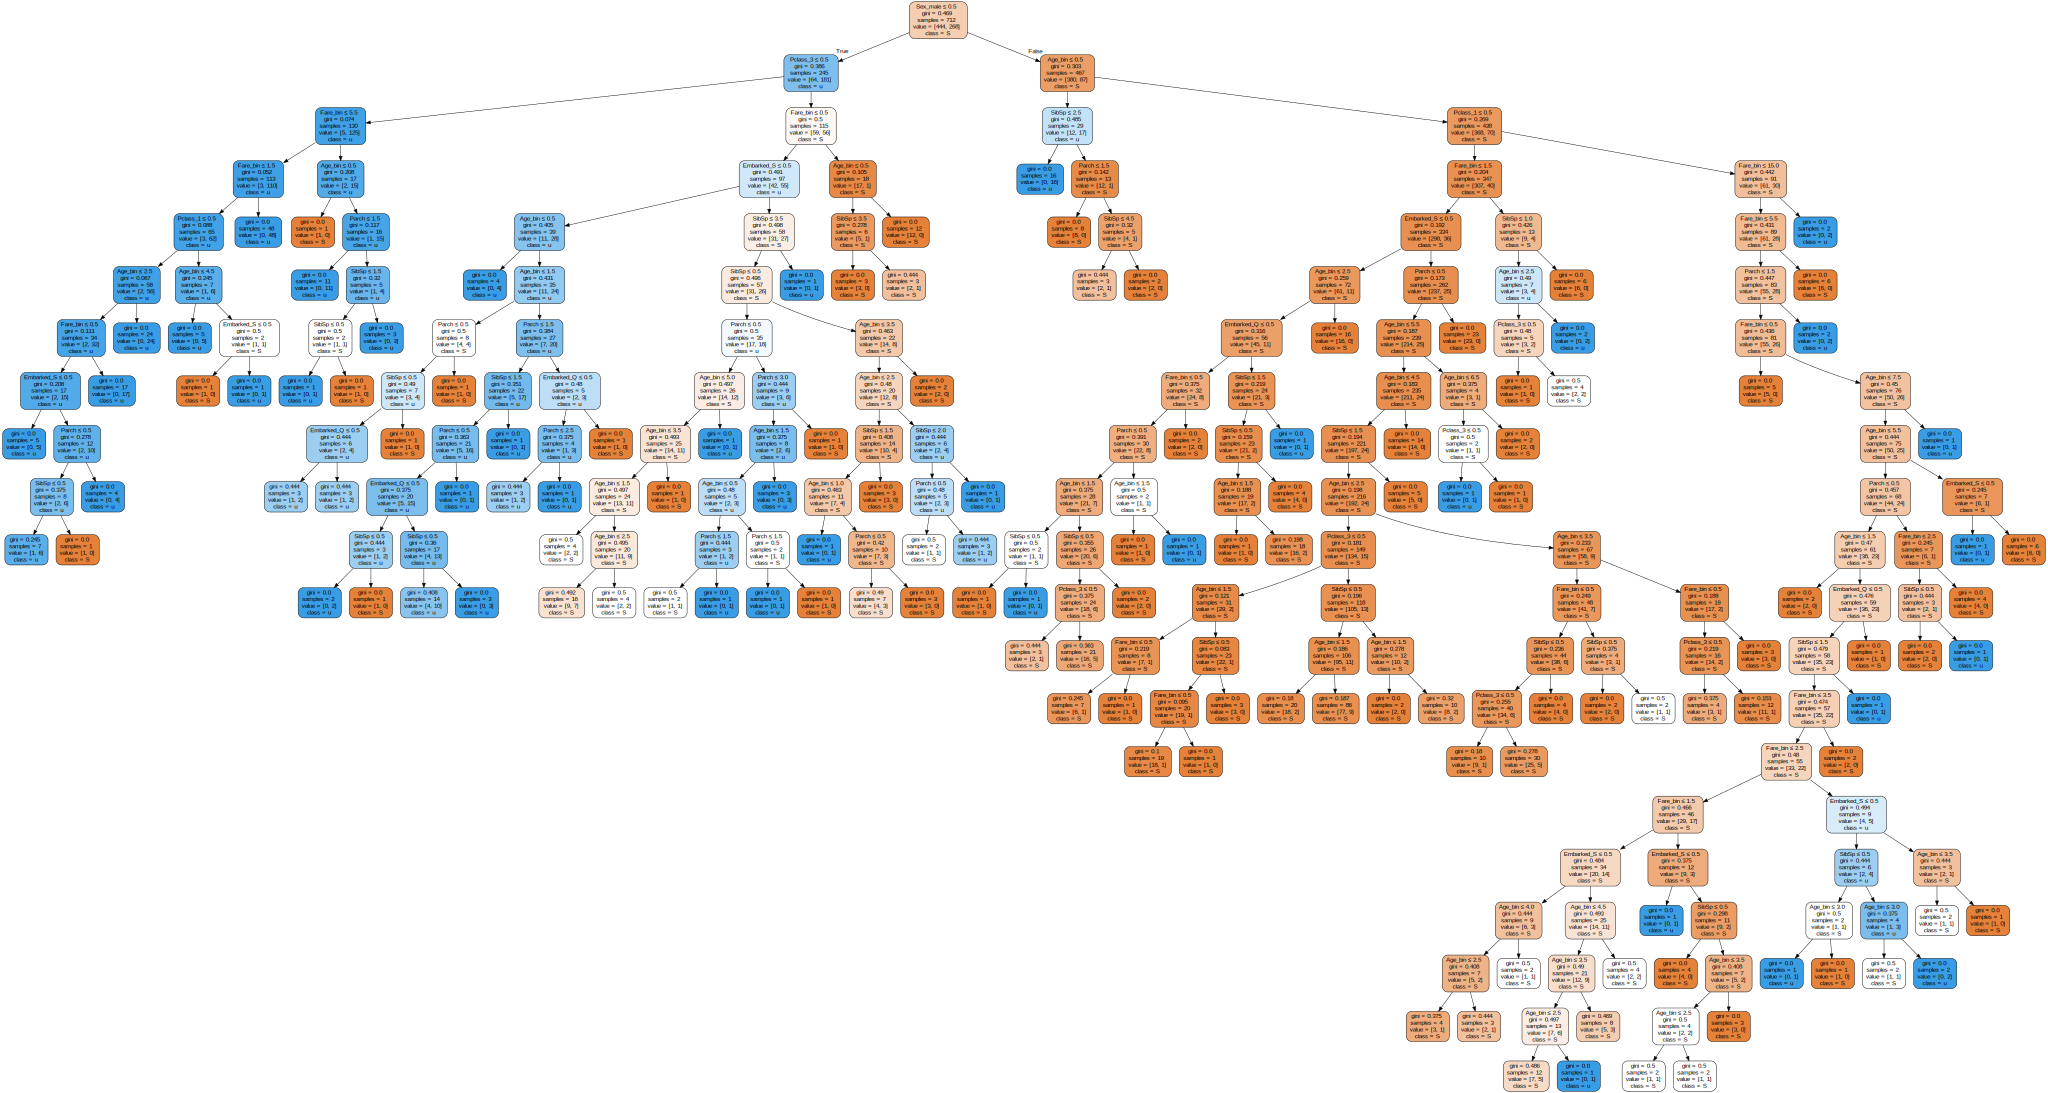

In [13]:
graph = graphviz.Source(dot_data)
graph

In [14]:
# graph.write('.\DT.png')

In [15]:
type(train_X)

numpy.ndarray

In [16]:
DT.feature_importances_

array([0.12776311, 0.03914348, 0.12645725, 0.07156109, 0.43292146,
       0.00744386, 0.0356411 , 0.02989612, 0.12917254])

In [17]:
# 特徴量の重要度が高い順に表示
print("特徴量の重要度が高い順：")
# sorted：reverse=True 降順
print(sorted(
    zip(map(lambda x: round(x, 3), DT.feature_importances_), train.iloc[:, 1:].columns),
    reverse=True))

特徴量の重要度が高い順：
[(0.433, 'Sex_male'), (0.129, 'Pclass_3'), (0.128, 'SibSp'), (0.126, 'Age_bin'), (0.072, 'Fare_bin'), (0.039, 'Parch'), (0.036, 'Embarked_S'), (0.03, 'Pclass_1'), (0.007, 'Embarked_Q')]


In [18]:
sorted(
    zip(map(lambda x: round(x, 3), DT.feature_importances_), train.iloc[:, 1:].columns),
    reverse=True)

[(0.433, 'Sex_male'),
 (0.129, 'Pclass_3'),
 (0.128, 'SibSp'),
 (0.126, 'Age_bin'),
 (0.072, 'Fare_bin'),
 (0.039, 'Parch'),
 (0.036, 'Embarked_S'),
 (0.03, 'Pclass_1'),
 (0.007, 'Embarked_Q')]

In [19]:
# ターゲットと特徴量の分割
test_x = test.iloc[:, 1:].values
test_y = test.Survived.values

In [20]:
test_x.shape, test_y.shape

((179, 9), (179,))

In [21]:
pred_y = DT.predict(test_x)

In [22]:
confusion_matrix(test_y, pred_y)

array([[89, 16],
       [18, 56]], dtype=int64)

In [23]:
accuracy_score(test_y, pred_y)

0.8100558659217877

In [24]:
# 検証データ読み込み
valid = pd.read_pickle('./pd_test.pk2')

In [25]:
valid.shape

(418, 15)

In [26]:
# ID の保存
valid_pass = valid.PassengerId.values

In [27]:
valid_X = valid.iloc[:, 1:]

In [28]:
valid_X.describe()

,Age,SibSp,Parch,Fare,Age_bin,Fare_bin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,29.599282,0.447368,0.392344,35.576535,2.476077,1.023923,0.363636,0.636364,0.244019,0.110048,0.645933,0.255981,0.222488,0.521531
std,12.703770,0.896760,0.981429,55.850103,1.301411,2.213844,0.481622,0.481622,0.430019,0.313324,0.478803,0.436934,0.416416,0.500135
min,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,14.454200,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,35.750000,1.000000,0.000000,31.471875,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,76.000000,8.000000,9.000000,512.329200,7.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
valid_X.drop(['Age', 'Fare', 'Sex_female', 'Embarked_C', 'Pclass_2'], inplace=True, axis=1)

In [30]:
valid_X.shape, train_X.shape

((418, 9), (712, 9))

In [31]:
pred_valid_y = DT.predict(valid_X)

In [32]:
pred_valid_y.shape

(418,)

In [33]:
type(valid_pass), type(pred_valid_y)

(numpy.ndarray, numpy.ndarray)

In [34]:
result_df = pd.DataFrame(pred_valid_y, valid_pass, columns=['Survived'])

In [36]:
result_df.to_csv("./tree_2.csv", index_label='PassengerId')